<a href="https://colab.research.google.com/github/naga-dheeraj-p/sql_practise/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [43]:
data=pd.read_csv('/content/sample_data/cell_samples.csv')
print(data.size)
print(data.shape)
data.head()


7689
(699, 11)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<Axes: xlabel='Clump', ylabel='UnifSize'>

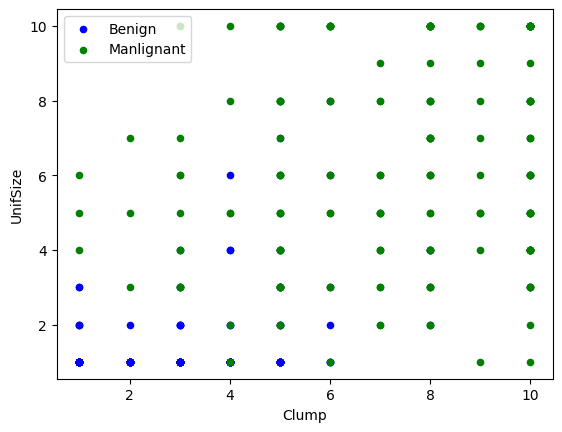

In [13]:
benign=data[data['Class']==2][0:200]
malignant=data[data['Class']==4][0:200]
AXE=benign.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant.plot(kind='scatter',x='Clump',y='UnifSize',color='green',label='Manlignant',ax=AXE)

In [16]:
#IDENTIFYING UNWANTED ROWS
data.dtypes
# HERE I HAVE CONVERTED THE object datatype IN 'BareNuc' into int
data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]
data['BareNuc']=data['BareNuc'].astype('int')
data.dtypes

<ipython-input-16-a6d9c3a0f629>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BareNuc']=data['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [21]:
data.columns
new=data.drop(['ID','Class'],axis=1)
new

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [22]:
x=np.asarray(new)
y=np.asarray(data['Class'])

x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)


In [34]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)
y_predict

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4])

In [35]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.98      0.92      0.95       132
           4       0.88      0.96      0.92        73

    accuracy                           0.94       205
   macro avg       0.93      0.94      0.93       205
weighted avg       0.94      0.94      0.94       205



In [41]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy*100,'%')

Accuracy: 93.65853658536587 %
